In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
print("After reshaping the training sample :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("After reshaping the testing sample :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

After reshaping the training sample : 60000 and each image is of shape (784)
After reshaping the testing sample : 10000 and each image is of shape (784)


In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
print("After converting the output into a vector : ",y_train[0])
print("After converting the output into a vector : ",y_test[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, BatchNormalization

# 2 layer Architecture

In [13]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
epochs = 20

In [16]:
model = Sequential()

hidden_layer_1 = Dense(512,input_shape=(input_dim,),activation='relu',name='hidden_layer_1')
hidden_layer_2 = Dense(128,activation='relu',name='hidden_layer_2')
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(hidden_layer_2)
model.add(output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 512)               401920    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               65664     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test),
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2335 - acc: 0.9314 - val_loss: 0.1056 - val_acc: 0.9687
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0861 - acc: 0.9740 - val_loss: 0.0891 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0749 - val_acc: 0.9768
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0680 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0688 - val_acc: 0.9798
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0222 - acc: 0.9929 - val_loss: 0.0771 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.0781 - val_acc

In [51]:
score = model.evaluate(X_test, y_test, verbose=0) 

In [52]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10698660328163441
Test accuracy: 0.9806


<IPython.core.display.Javascript object>


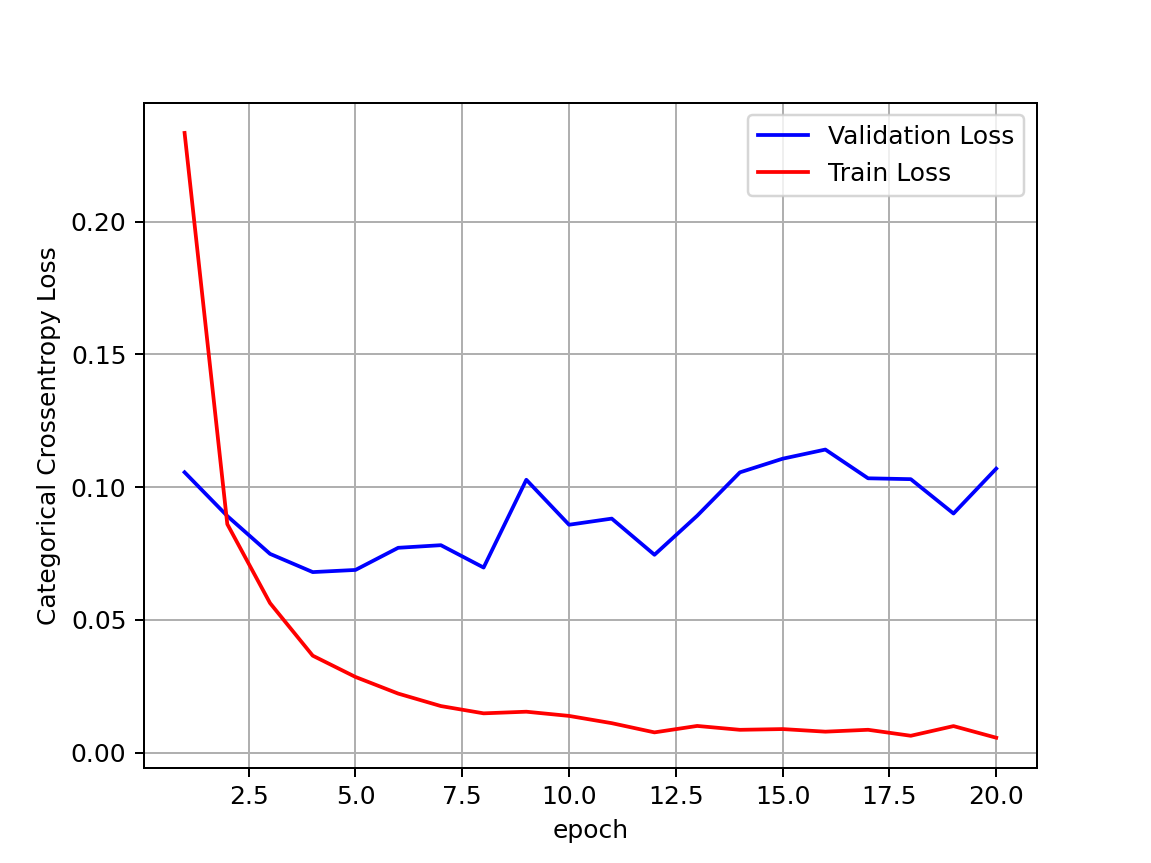

In [53]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2 Layers with batch Normalization

In [19]:
model = Sequential()

hidden_layer_1 = Dense(512,input_shape=(input_dim,),activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
hidden_layer_2 = Dense(128,activation='relu',name='hidden_layer_2')
batch_2 = BatchNormalization()
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(hidden_layer_2)
model.add(batch_2)
model.add(output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [21]:
epochs=10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test),
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10



60000/60000 [==============================] - 4s 67us/step - loss: 0.1816 - acc: 0.9462 - val_loss: 0.0986 - val_acc: 0.9680
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0691 - acc: 0.9791 - val_loss: 0.0966 - val_acc: 0.9689
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0474 - acc: 0.9853 - val_loss: 0.0760 - val_acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0802 - val_acc: 0.9748
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0258 - acc: 0.9920 - val_loss: 0.0903 - val_acc: 0.9736
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0667 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0182 - acc: 0.9942 - val_loss: 0.0773 - val_acc: 0.9781
Epoch 8/10
60000/60000 [============================

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.07202633481275988
Test accuracy: 0.9796


<IPython.core.display.Javascript object>


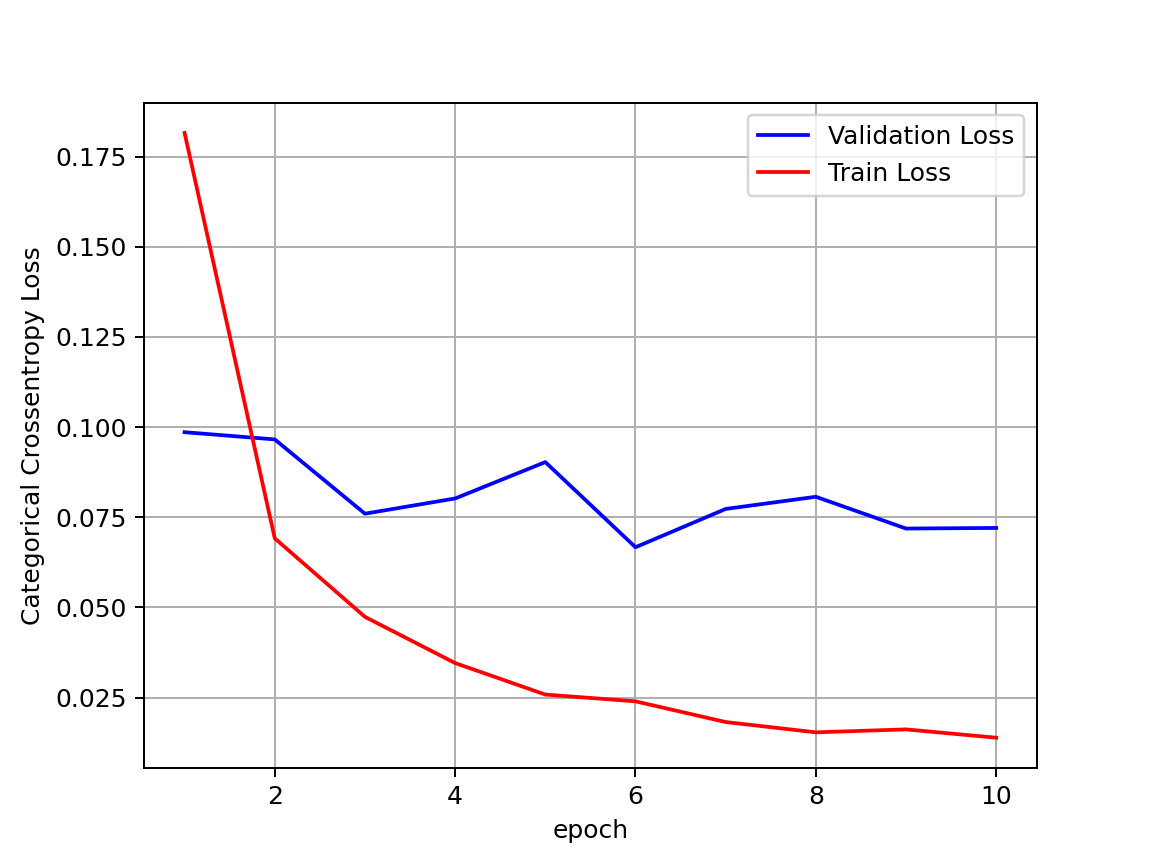

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2 layer architecture with drop out

In [25]:
model = Sequential()

hidden_layer_1 = Dense(512,input_shape=(input_dim,),activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
drop_out_1 = Dropout(rate=0.50)
hidden_layer_2 = Dense(128,activation='relu',name='hidden_layer_2')
drop_out_2 = Dropout(rate=0.25)
batch_2 = BatchNormalization()
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(drop_out_1)
model.add(hidden_layer_2)
model.add(batch_2)
model.add(drop_out_2)
model.add(output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
epochs=10
history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_test, y_test),
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3213 - acc: 0.9026 - val_loss: 0.1228 - val_acc: 0.9624
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.1622 - acc: 0.9505 - val_loss: 0.0995 - val_acc: 0.9674
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1292 - acc: 0.9595 - val_loss: 0.0850 - val_acc: 0.9729
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1141 - acc: 0.9648 - val_loss: 0.0787 - val_acc: 0.9757
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.1004 - acc: 0.9685 - val_loss: 0.0697 - val_acc: 0.9775
Epoch 6/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0908 - acc: 0.9718 - val_loss: 0.0698 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0849 - acc: 0.9735 - val_loss: 0.0609 - val_acc

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.05805287803456886
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


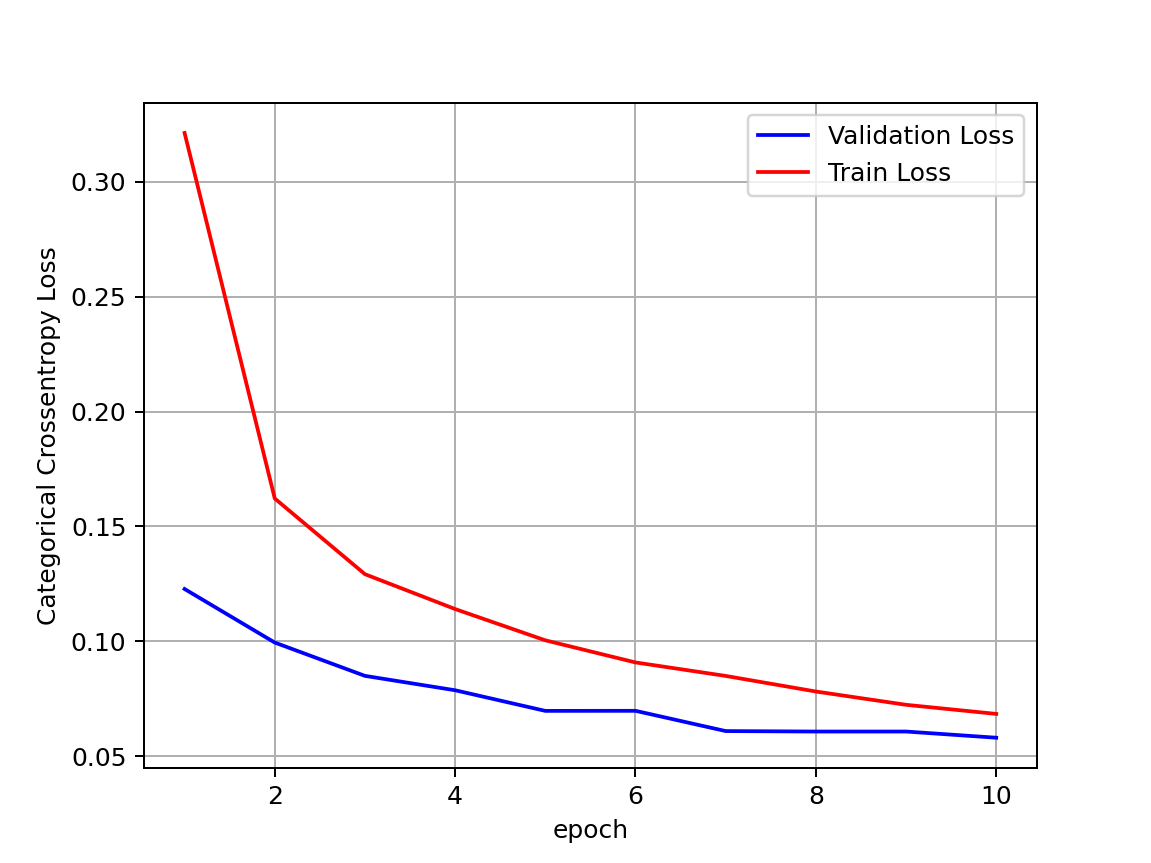

In [28]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3. Layer Architecture

In [36]:
model = Sequential()
hidden_layer_1 = Dense(500,input_dim=input_dimension,activation='relu',name='hidden_layer_1')
hidden_layer_2 = Dense(200,activation='relu',name='hidden_layer_2')
hidden_layer_3 = Dense(100,activation='relu',name='hidden_layer_3')
output = Dense(output_dimension, input_dim=input_dimension, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(hidden_layer_2)
model.add(hidden_layer_3)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 500)               392500    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)               100200    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 100)               20100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 513,810
Trainable params: 513,810
Non-trainable params: 0
_________________________________________________________________


In [39]:
epochs=20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0950 - val_acc: 0.9843
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0999 - val_acc: 0.9835
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.1010 - val_acc: 0.9809
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.1129 - val_acc: 0.9811
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0045 - acc: 0.9986 - val_loss: 0.1194 - val_acc: 0.9817
Epoch 6/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.1048 - val_acc: 0.9831
Epoch 7/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0047 - acc: 0.9988 - val_loss: 0.1171 - val_acc

In [40]:
score = model.evaluate(X_test, y_test, verbose=0) 

In [41]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10319470737203341
Test accuracy: 0.9843


<IPython.core.display.Javascript object>


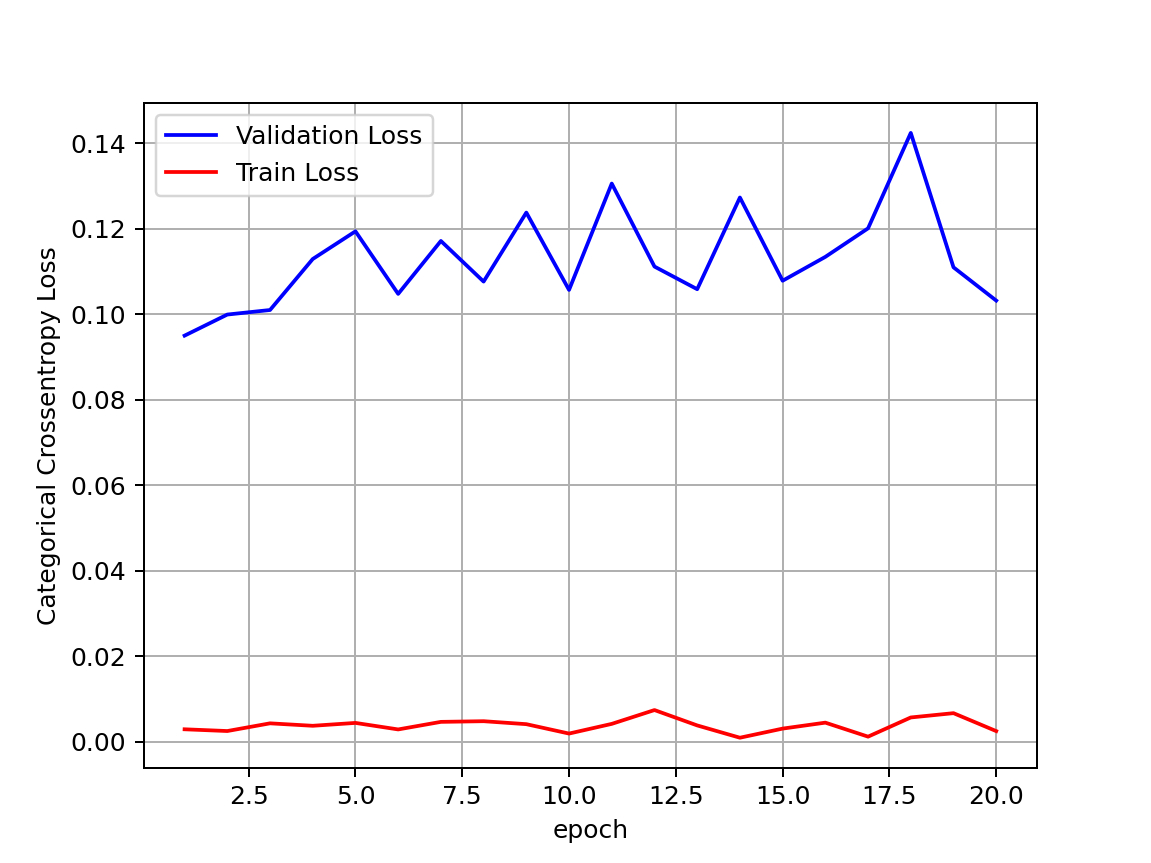

In [42]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3.Layers with batch normalization

In [30]:
model = Sequential()
hidden_layer_1 = Dense(500,input_dim=input_dim,activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
hidden_layer_2 = Dense(200,activation='relu',name='hidden_layer_2')
hidden_layer_3 = Dense(100,activation='relu',name='hidden_layer_3')
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(hidden_layer_2)
model.add(hidden_layer_3)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 500)               392500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)               100200    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 100)               20100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 515,810
Trainable params: 514,810
Non-trainable params: 1,000
_________________________________________________________________


In [32]:
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1817 - acc: 0.9445 - val_loss: 0.1052 - val_acc: 0.9666
Epoch 2/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0703 - acc: 0.9783 - val_loss: 0.1125 - val_acc: 0.9647
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0525 - acc: 0.9829 - val_loss: 0.0861 - val_acc: 0.9733
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0392 - acc: 0.9866 - val_loss: 0.0924 - val_acc: 0.9754
Epoch 5/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0316 - acc: 0.9893 - val_loss: 0.0797 - val_acc: 0.9764


Test score: 0.07970767500349903
Test accuracy: 0.9764


<IPython.core.display.Javascript object>


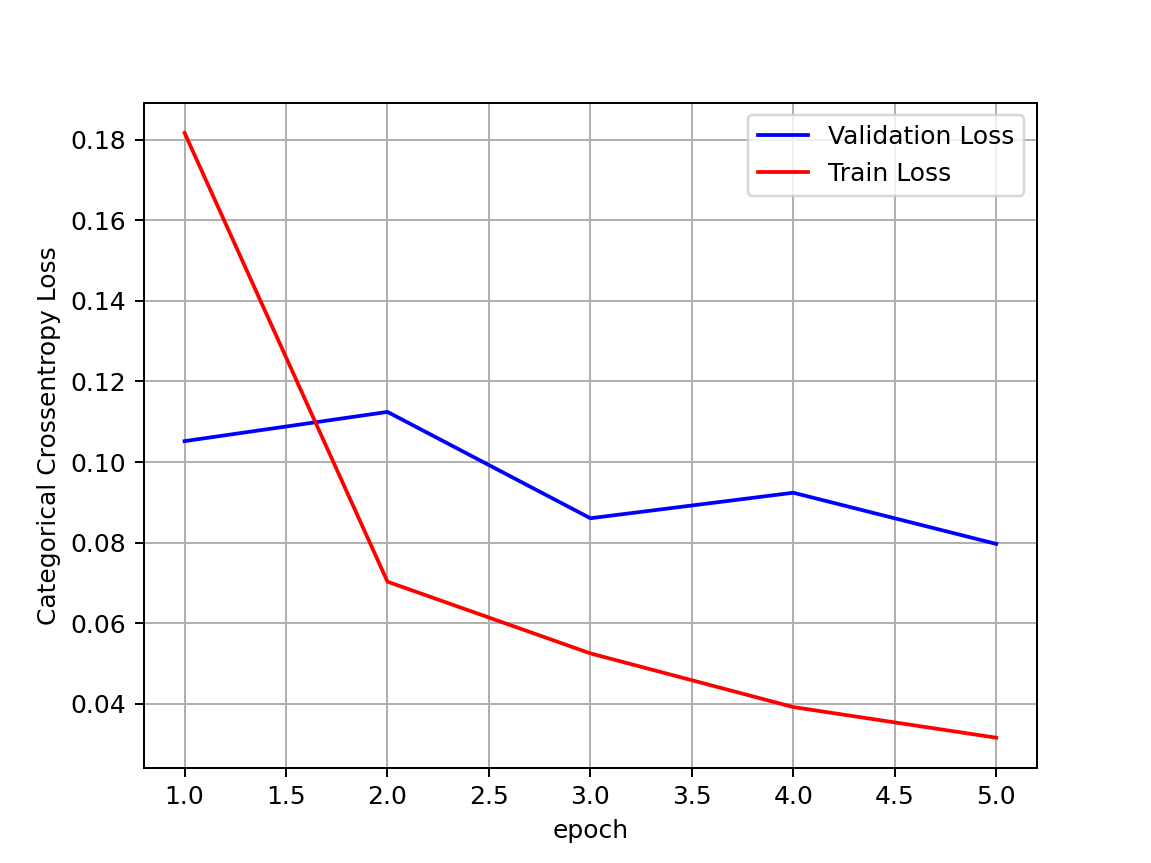

In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Layers with Dropouts

In [35]:
model = Sequential()
hidden_layer_1 = Dense(500,input_dim=input_dim,activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
drop_out = Dropout(rate=0.5)
hidden_layer_2 = Dense(200,activation='relu',name='hidden_layer_2')
hidden_layer_3 = Dense(100,activation='relu',name='hidden_layer_3')
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(drop_out)
model.add(hidden_layer_2)
model.add(hidden_layer_3)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 500)               392500    
_________________________________________________________________
batch_normalization_8 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)               100200    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 100)               20100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 515,810
Trainable params: 514,810
Non-trainable params: 1,000
_________________________________________________________________


In [36]:
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2726 - acc: 0.9174 - val_loss: 0.1149 - val_acc: 0.9626
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1383 - acc: 0.9564 - val_loss: 0.0955 - val_acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1119 - acc: 0.9652 - val_loss: 0.0814 - val_acc: 0.9759
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0965 - acc: 0.9688 - val_loss: 0.0772 - val_acc: 0.9760
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0855 - acc: 0.9721 - val_loss: 0.0795 - val_acc: 0.9752


Test score: 0.07950529584407341
Test accuracy: 0.9752


<IPython.core.display.Javascript object>


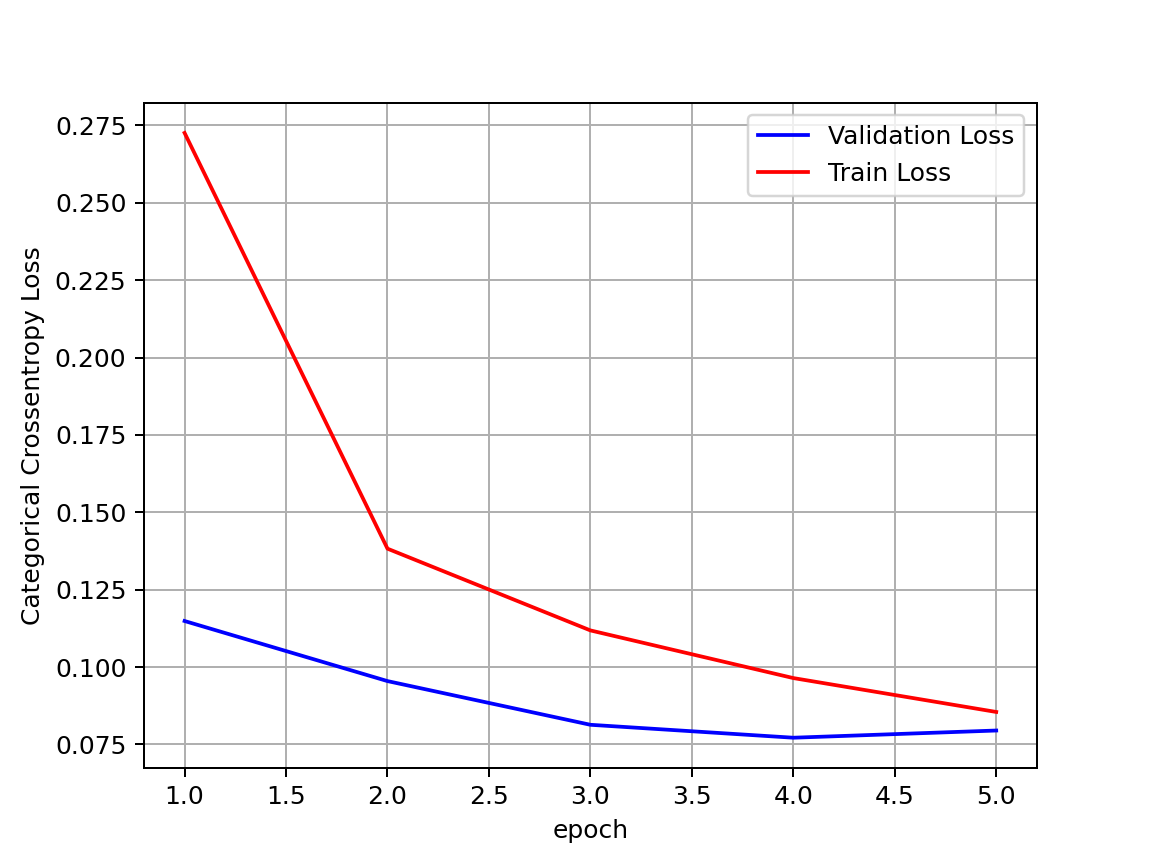

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Layer architecture

In [44]:
model = Sequential()
hidden_layer_1 = Dense(700,input_dim=input_dimension,activation='relu',name='hidden_layer_1')
hidden_layer_2 = Dense(500,activation='relu',name='hidden_layer_2')
hidden_layer_3 = Dense(300,activation='relu',name='hidden_layer_3')
hidden_layer_4 = Dense(150,activation='relu',name='hidden_layer_4')
hidden_layer_5 = Dense(50,activation='relu',name='hidden_layer_5')
output = Dense(output_dimension, input_dim=input_dimension, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(hidden_layer_2)
model.add(hidden_layer_3)
model.add(hidden_layer_4)
model.add(hidden_layer_5)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 700)               549500    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 500)               350500    
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 300)               150300    
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 150)               45150     
_________________________________________________________________
hidden_layer_5 (Dense)       (None, 50)                7550      
_________________________________________________________________
output_layer (Dense)         (None, 10)                510       
Total params: 1,103,510
Trainable params: 1,103,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0426 - acc: 0.9866 - val_loss: 0.0780 - val_acc: 0.9791
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.0770 - val_acc: 0.9798
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0307 - acc: 0.9905 - val_loss: 0.0832 - val_acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0251 - acc: 0.9923 - val_loss: 0.0791 - val_acc: 0.9794
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0800 - val_acc: 0.9821


Test score: 0.08003212646024621
Test accuracy: 0.9821


<IPython.core.display.Javascript object>


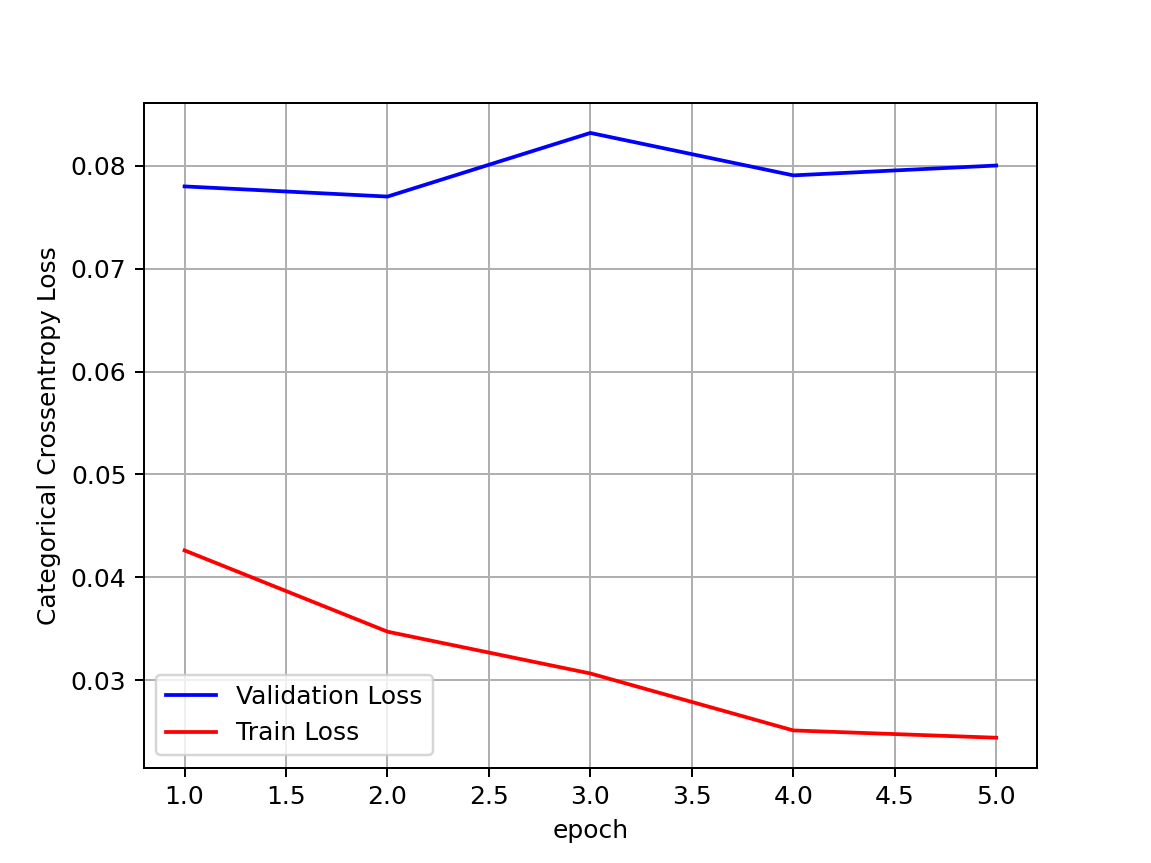

In [47]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 layers with batch normalization

In [39]:
model = Sequential()
hidden_layer_1 = Dense(700,input_dim=input_dim,activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
hidden_layer_2 = Dense(500,activation='relu',name='hidden_layer_2')
batch_2 = BatchNormalization()
hidden_layer_3 = Dense(300,activation='relu',name='hidden_layer_3')
hidden_layer_4 = Dense(150,activation='relu',name='hidden_layer_4')
hidden_layer_5 = Dense(50,activation='relu',name='hidden_layer_5')
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(hidden_layer_2)
model.add(batch_2)
model.add(hidden_layer_3)
model.add(hidden_layer_4)
model.add(hidden_layer_5)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 700)               549500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 700)               2800      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 500)               350500    
_________________________________________________________________
batch_normalization_10 (Batc (None, 500)               2000      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 300)               150300    
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 150)               45150     
_________________________________________________________________
hidden_layer_5 (Dense)       (None, 50)                7550      
__________

In [40]:
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.1933 - acc: 0.9421 - val_loss: 0.1209 - val_acc: 0.9609
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0887 - acc: 0.9728 - val_loss: 0.0925 - val_acc: 0.9724
Epoch 3/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0648 - acc: 0.9794 - val_loss: 0.0983 - val_acc: 0.9717
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0504 - acc: 0.9838 - val_loss: 0.1085 - val_acc: 0.9702
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0911 - val_acc: 0.9761


Test score: 0.09106961331287167
Test accuracy: 0.9761


<IPython.core.display.Javascript object>


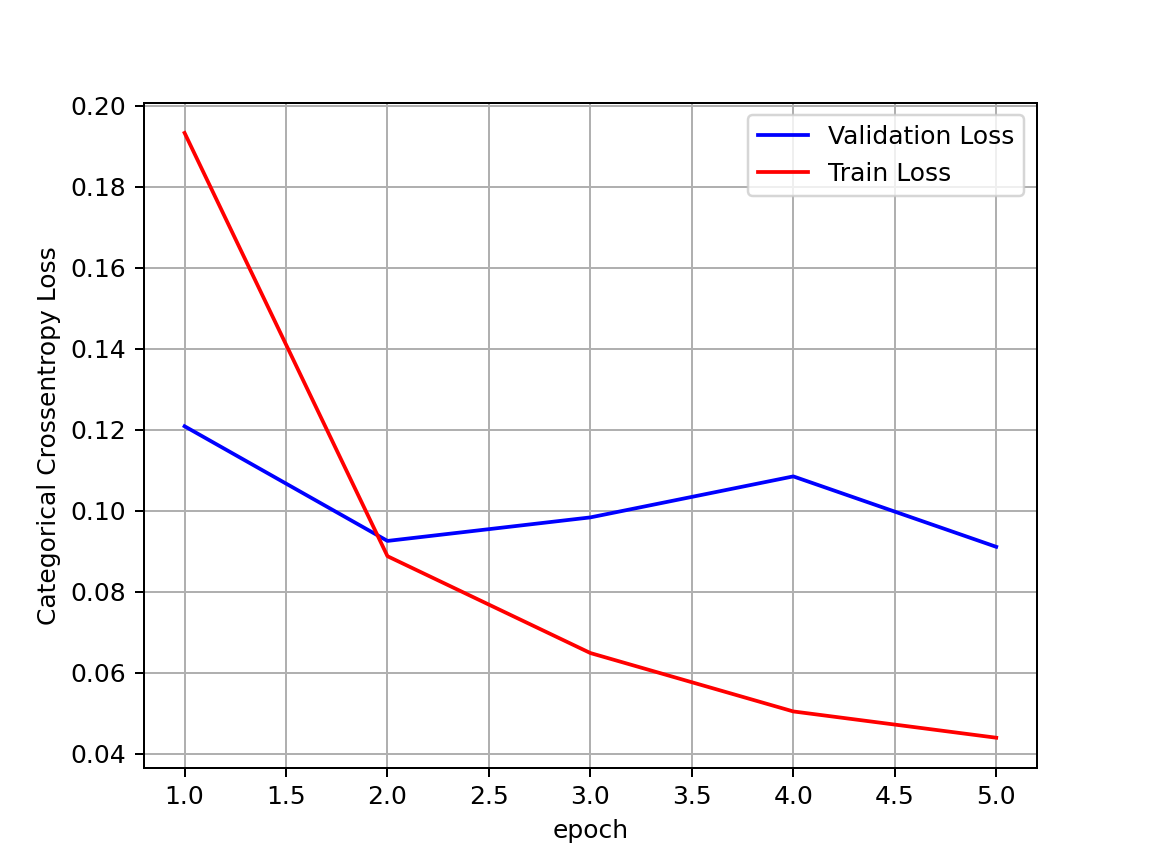

In [41]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 layer architecture with Dropouts

In [42]:
model = Sequential()
hidden_layer_1 = Dense(700,input_dim=input_dim,activation='relu',name='hidden_layer_1')
batch_1 = BatchNormalization()
droput_out_1 = Dropout(rate=0.5)
hidden_layer_2 = Dense(500,activation='relu',name='hidden_layer_2')
batch_2 = BatchNormalization()
droput_out_2 = Dropout(rate=0.5)
hidden_layer_3 = Dense(300,activation='relu',name='hidden_layer_3')
hidden_layer_4 = Dense(150,activation='relu',name='hidden_layer_4')
hidden_layer_5 = Dense(50,activation='relu',name='hidden_layer_5')
output = Dense(output_dim, input_dim=input_dim, activation='softmax', name="output_layer")

model.add(hidden_layer_1)
model.add(batch_1)
model.add(drop_out_1)
model.add(hidden_layer_2)
model.add(batch_2)
model.add(drop_out_2)
model.add(hidden_layer_3)
model.add(hidden_layer_4)
model.add(hidden_layer_5)
model.add(output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 700)               549500    
_________________________________________________________________
batch_normalization_11 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 500)               350500    
_________________________________________________________________
batch_normalization_12 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 300)               150300    
__________

In [43]:
epochs=5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.2849 - acc: 0.9130 - val_loss: 0.1313 - val_acc: 0.9580
Epoch 2/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.1512 - acc: 0.9539 - val_loss: 0.1113 - val_acc: 0.9665
Epoch 3/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.1180 - acc: 0.9632 - val_loss: 0.0836 - val_acc: 0.9750
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.1037 - acc: 0.9675 - val_loss: 0.0863 - val_acc: 0.9733
Epoch 5/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0936 - acc: 0.9703 - val_loss: 0.0792 - val_acc: 0.9747


Test score: 0.07919207404989284
Test accuracy: 0.9747


<IPython.core.display.Javascript object>


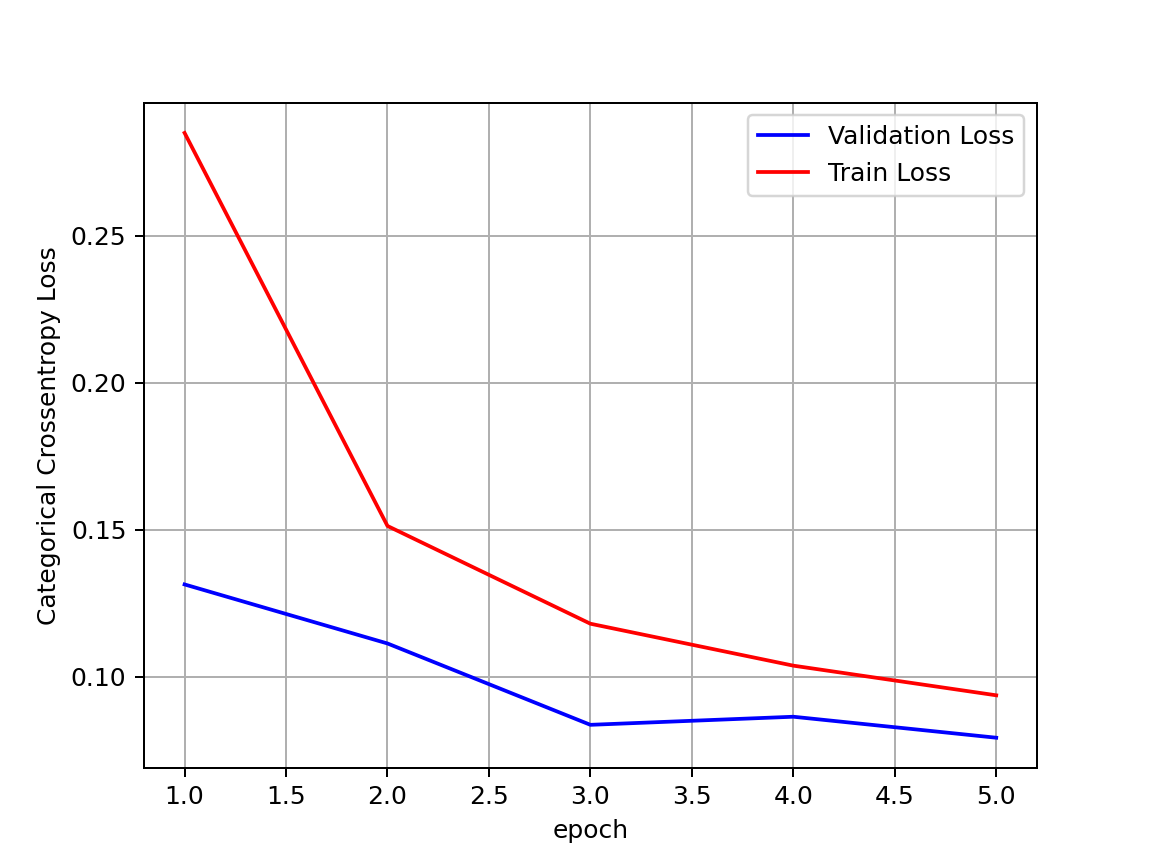

In [44]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)